In [ ]:
# import of needed librairies
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from skimage.transform import resize

C:\Users\SEZINE\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [ ]:
#define filepath for our dataset
base_dir=os.getcwd()
train_dir=os.path.join(base_dir,'data/train_set')
test_dir=os.path.join(base_dir,'data/test_set')

In [ ]:
train_classes = os.listdir(train_dir)
test_classes = os.listdir(test_dir)
print(train_classes)
print(test_classes)


['glioma', 'meningioma', 'notumor', 'pituitary']
['glioma', 'meningioma', 'notumor', 'pituitary']


In [ ]:

def show_sample_images(directory):
    sample_images=np.random.choice(os.listdir(directory),size=6)
    plt.figure(figsize=(8,4))
    for i,img_name in enumerate(sample_images):
        ax=plt.subplot(2,3,i+1)
        img=image.load_img(os.path.join(directory,img_name),target_size=(150,150))
        
        # Lister tous les fichiers dans le dossier
        fichiers = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

        # Compter le nombre de fichiers
        nombre_de_fichiers = len(fichiers)
        classe_name=directory.split('\\')[-1]
        plt.axis("off")
        plt.imshow(img)
        plt.title(classe_name)
    print(f"Nombre d'images pour la classe {classe_name} : {nombre_de_fichiers}")
    print(f'la taille des images est de :{img.size}')
    

Nombre d'images pour la classe glioma : 1321
la taille des images est de :(150, 150)


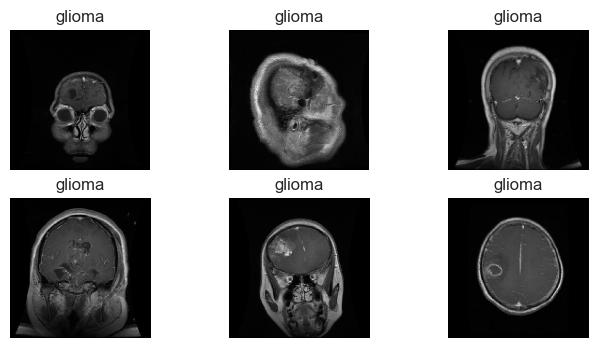

In [ ]:
glioma_dir=os.path.join(train_dir,'glioma')
show_sample_images(glioma_dir)


Nombre d'images pour la classe meningioma : 1339
la taille des images est de :(150, 150)


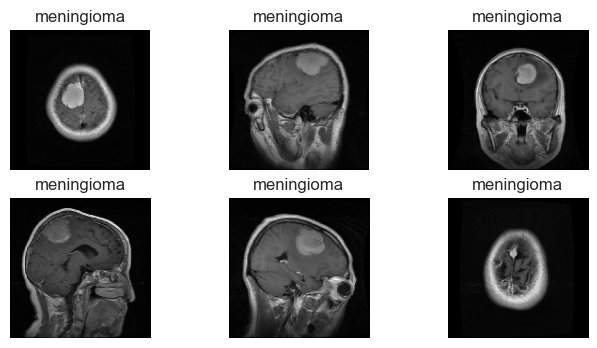

In [ ]:
meningioma_dir=os.path.join(train_dir,'meningioma')
show_sample_images(meningioma_dir)

Nombre d'images pour la classe notumor : 1595
la taille des images est de :(150, 150)


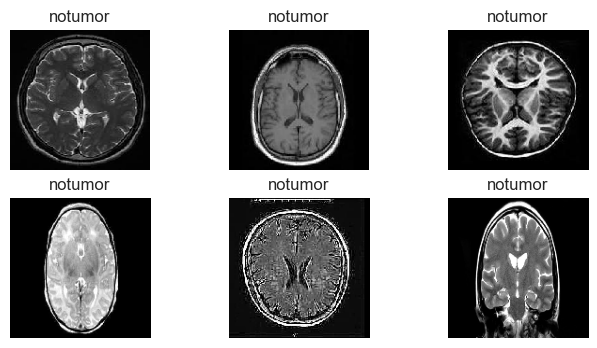

In [ ]:
notumor_dir=os.path.join(train_dir,'notumor')
show_sample_images(notumor_dir)

Nombre d'images pour la classe pituitary : 1457
la taille des images est de :(150, 150)


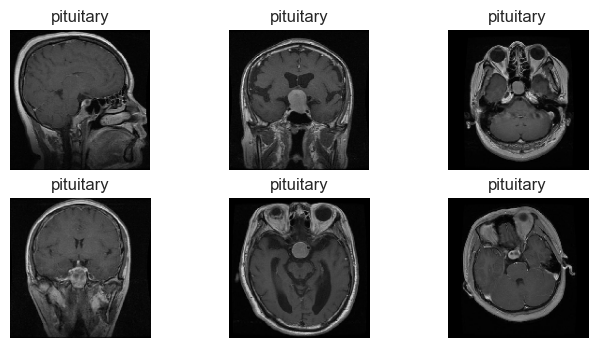

In [ ]:
pituitary_dir=os.path.join(train_dir,'pituitary')
show_sample_images(pituitary_dir)

***The ImageDataGenerator*** in deep learning is crucial for **augmenting image datasets*** by applying random transformations like 
- rotation, 
- zoom,
- flipping during training...

This helps create more diverse training data, which 
- improves model generalization, 
- reduces overfitting, 
- enhances the model's ability to handle variations in real-world data, even with a limited dataset.

we have for instance:
![image](images\datagen.png)

In [ ]:
train_datagen= ImageDataGenerator(
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen= ImageDataGenerator(
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator=train_datagen.flow_from_directory(
            train_dir,
            target_size=(224,224),
            batch_size=64,
            class_mode='categorical')

test_generator=test_datagen.flow_from_directory(
            test_dir,
            target_size=(224,224),
            batch_size=64,
            class_mode='categorical')



Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


##### Convolution and pooling are key operations in Convolutional Neural Networks (CNNs) for processing images
Together, convolution and pooling allow CNNs to efficiently learn and extract relevant features from images, enabling tasks like object detection and image classification.



**Convolution:** This operation applies filters (kernels) to the input image, detecting features like edges, textures, and patterns. It helps the network learn spatial hierarchies by focusing on local regions of the image and creating feature maps that highlight important aspects of the input.
![image](images\conv.png)

**Pooling: Pooling (often max pooling)**
reduces the spatial dimensions of the feature maps while retaining the most important information. This operation helps make the network more robust to variations like slight translations and reduces the computational complexity by downsampling the data.
![image](images\pooling.png)


In [ ]:
# building our CNN model
model=tf.keras.Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense( 4, activation='softmax')])

In [ ]:
#General informations about the model
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)                   │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 72, 72, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 34, 34, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 9248)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 128)                 │       1,183,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,213,892 (4.63 MB)

 Trainable params: 1,213,892 (4.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

**Callbacks** in deep learning are essential for monitoring and controlling the training process. They allow you to perform actions like 
- early stopping to prevent overfitting, 
- saving model checkpoints during training, 
- adjusting learning rates dynamically,
- logging metrics for analysis. 

This helps optimize the model’s performance, improves training efficiency, and provides better control over the training process.

In [ ]:
# Définir les callbacks
callbacks = [
    # Arrêt anticipé si la validation loss ne s'améliore pas après 3 époques
    EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True),
    
    # Sauvegarder les poids du modèle chaque fois que la validation accuracy s'améliore
    ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True),
    
    # Réduire le taux d'apprentissage si la validation loss ne s'améliore pas
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)
]

history=model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=callbacks
)

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.3374 - loss: 15.5091 - val_accuracy: 0.4836 - val_loss: 1.1766 - learning_rate: 0.0010
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.4848 - loss: 1.0912 - val_accuracy: 0.5698 - val_loss: 1.0281 - learning_rate: 0.0010
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.5953 - loss: 0.9244 - val_accuracy: 0.5584 - val_loss: 1.0202 - learning_rate: 0.0010
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.6174 - loss: 0.8812 - val_accuracy: 0.5820 - val_loss: 1.0045 - learning_rate: 0.0010
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.6524 - loss: 0.8158 - val_accuracy: 0.6217 - val_loss: 0.9817 - learning_rate: 0.0010
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.6671 - loss: 0.8163 - val_accuracy: 0.6384 - val_loss: 0.8759 - learning_rate: 0.0010
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.7072 - loss: 0.7344 - val_ac

In [ ]:
model.evaluate(test_generator)

21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 881ms/step - accuracy: 0.7226 - loss: 0.7155


[0.7123637795448303, 0.7208238244056702]

In [ ]:
# Plotting learning curves
plt.figure(figsize=(8,4))
def plot_learning_curves(history):
    
    
    plt.subplot(2,1,1)
    
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('train Accuracy vs val_accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()
    
    # Summarize history for loss
    plt.subplot(2,1,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('train_loss vs val_loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()



<Figure size 800x400 with 0 Axes>

In [ ]:
# Call the function to plot
plot_learning_curves(history)

=============================================================================

********

## Tranfert learning approche:

**Transfer learning** involves using a pre-trained model on a new but related task. You start with a model trained on a large dataset and adapt it for a specific problem by reusing its learned features. Typically, you freeze the earlier layers and train new or modified layers on your task. This approach speeds up training and improves performance with less data. It’s commonly used in fields like image classification and natural language processing.

**Transfer learning** is important because it allows models to leverage knowledge from pre-trained models on large datasets, enabling faster and more efficient learning on new tasks, especially when labeled data is scarce. It improves model performance by starting with pre-learned features, reduces the computational cost, and can achieve higher accuracy with less training data, making it particularly valuable in fields like image classification and natural language processing.
![image](images\transfert_learning.png)

Here’s a non exhaustive list of popular transfer learning models:

- ResNet50: Known for its deep architecture and residual connections.
- VGG16: A simpler, yet effective model with 16 layers.
- InceptionV3: Efficient model with inception modules for multi-scale feature extraction.
- MobileNet: Lightweight model optimized for mobile and embedded devices.
- EfficientNet: Scalable model that balances accuracy and computational efficiency.

### let's continue with ResNet50

**ResNet50** is a widely-used Convolutional Neural Network (CNN) architecture known for its deep structure and effectiveness in image classification tasks. It is part of the Residual Networks (ResNet) family, which introduced the concept of "residual learning" to address the problem of vanishing gradients in deep networks.

- The ResNet50 model was originally trained on images with a size of 224x224 pixels. This size is standard for many pre-trained models on the ImageNet dataset, used for image classification tasks.


In [ ]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y)

In [ ]:
from tensorflow.keras.applications import ResNet50

# Load the ResNet50 model pre-trained on ImageNet without the top (classification) layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224, 3))

# Create a new model and add the ResNet50 base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))  # Assuming 4 classes

# Freeze the layers of ResNet50 to prevent them from being trained
base_model.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Assuming `train_generator` and `validation_generator` are your data generators
callbacks = [
    # Arrêt anticipé si la validation loss ne s'améliore pas après 3 époques
    EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True),
    
    # Sauvegarder les poids du modèle chaque fois que la validation accuracy s'améliore
    ModelCheckpoint('best_TL_model2.keras', monitor='val_accuracy', save_best_only=True),
    
    # Réduire le taux d'apprentissage si la validation loss ne s'améliore pas
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)
]


# Train the model
history=model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=callbacks
)


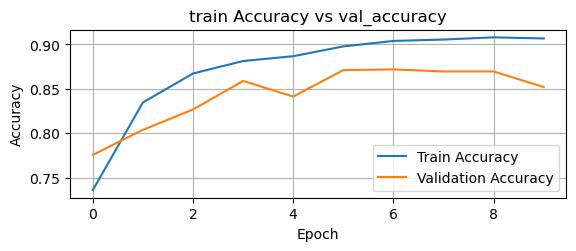

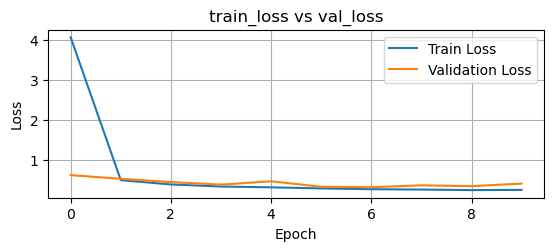

In [ ]:
plot_learning_curves(history)

In [ ]:
model.evaluate(test_generator)

21/21 ━━━━━━━━━━━━━━━━━━━━ 172s 8s/step - accuracy: 0.8715 - loss: 0.3204


[0.33964696526527405, 0.8695651888847351]

In [ ]:
model=load_model("best_TL_model2.keras")

In [ ]:
from tensorflow.keras.preprocessing import image
def prediction(img):
    img=image.load_img((img),target_size=(224,224))
    plt.imshow(img)
    plt.axis("off")
    img_array=image.img_to_array(img)
    img_array=img_array.reshape(1,224,224, 3)
    predicted_scores=model.predict(img_array)
    return predicted_scores

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
[[7.7455933e-04 9.4744833e-03 5.5798009e-04 9.8919302e-01]]
pituitary
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
[[9.9991727e-01 6.7100598e-05 1.5672227e-05 2.6807723e-10]]
glioma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
[[1.7573393e-22 2.1600474e-07 9.9999976e-01 3.1754516e-28]]
notumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
[[6.3427280e-05 1.9288660e-04 2.6563091e-06 9.9974114e-01]]
pituitary
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
[[2.6996564e-05 2.4461962e-04 3.5271866e-04 9.9937576e-01]]
pituitary
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
[[0.877367   0.10370105 0.00944761 0.00948427]]
glioma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
[[1.4482472e-04 1.4785202e-03 2.5294053e-03 9.9584728e-01]]
pituitary
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
[[6.6667361e-19 5.7766229e-05 9.9994218e-01 3.9543124e-19]]
notumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
[[9.9960393e-01 3.9610988e-04 9.1874472e-09 1.2945039e-08]]
glioma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
[[5.1

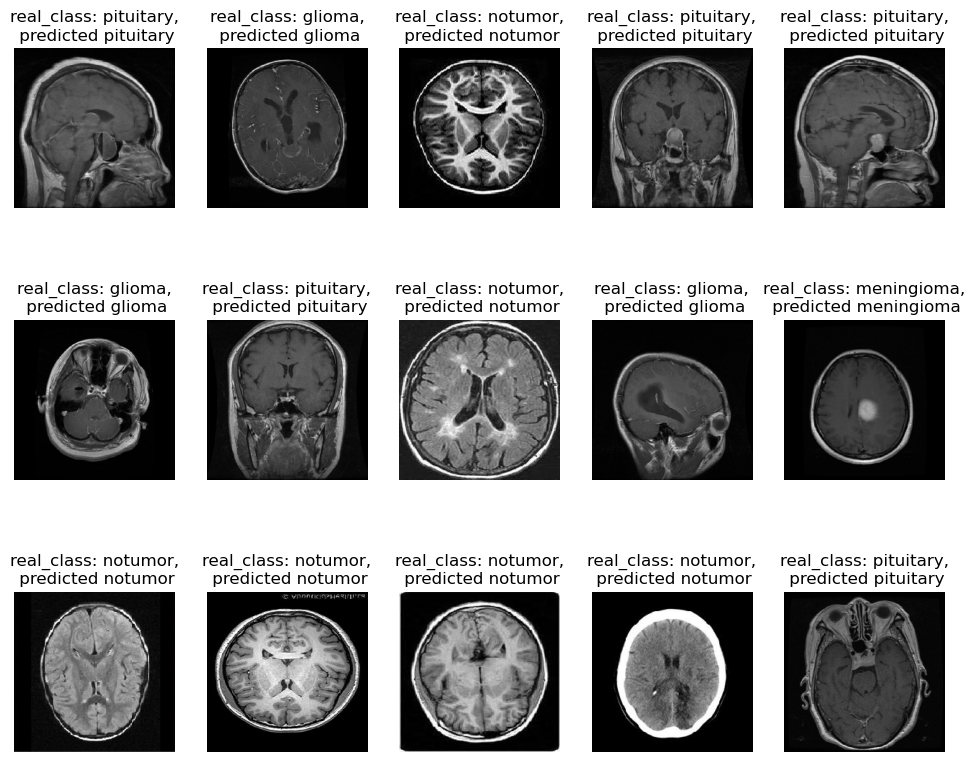

In [ ]:
compteur=0
plt.figure(figsize=(12,10))
while compteur<15:
    
    #to plot many images once
    plt.subplot(3,5,compteur+1)
    
    #choose a class randomly in test_set
    classe = random.choice(test_classes)
    
    #define the path for this specifique class
    path=os.path.join(test_dir,classe)
    
    # load files in this class choosed randomly
    file_names=[f for f in os.listdir(path)]
    
    #choose an image randomly in the list of files
    img_name = random.choice(file_names)
    img_name=os.path.join(path,img_name)
    
    #make prediction
    predicted_classe=prediction(img_name)
    print(predicted_classe)
    print(classe)


    #get the predicted class name
    predicted_classe_name=test_classes[np.argmax(predicted_classe)]
    
    if predicted_classe_name != classe:
        fig.patch.set_facecolor('lightblue')  # Couleur de fond de la figure
        ax.set_facecolor('lightblue')

    plt.title(f"real_class: {classe},\n predicted {predicted_classe_name}")
    """print(f'type de tumor:{classe}')
    print(f'type de tumor predict:{predicted_classe_name}')"""
    compteur+=1



# Thanks for your attention. Hope You learn something